In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import math
import cv2 as cv
import scipy
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [2]:
# Defining the Dynamics of the Aizawa Attractor

# Defining the constants required
alpha = 0.095
beta = 0.7
gamma = 0.65
delta = 3.5
epsilon = 0.1
    
# System Dynamics in a function routine
def aizawa_attractor_dynamics(t, state):
    x = state[0]
    y = state[1]
    z = state[2]
    dxdt = x*(z - beta) - delta*y
    dydt = delta*x + y*(z-beta)
    dzdt = gamma + alpha*z - ((z**3)/3) + (epsilon*z*(x**3))
    return [dxdt, dydt, dzdt]

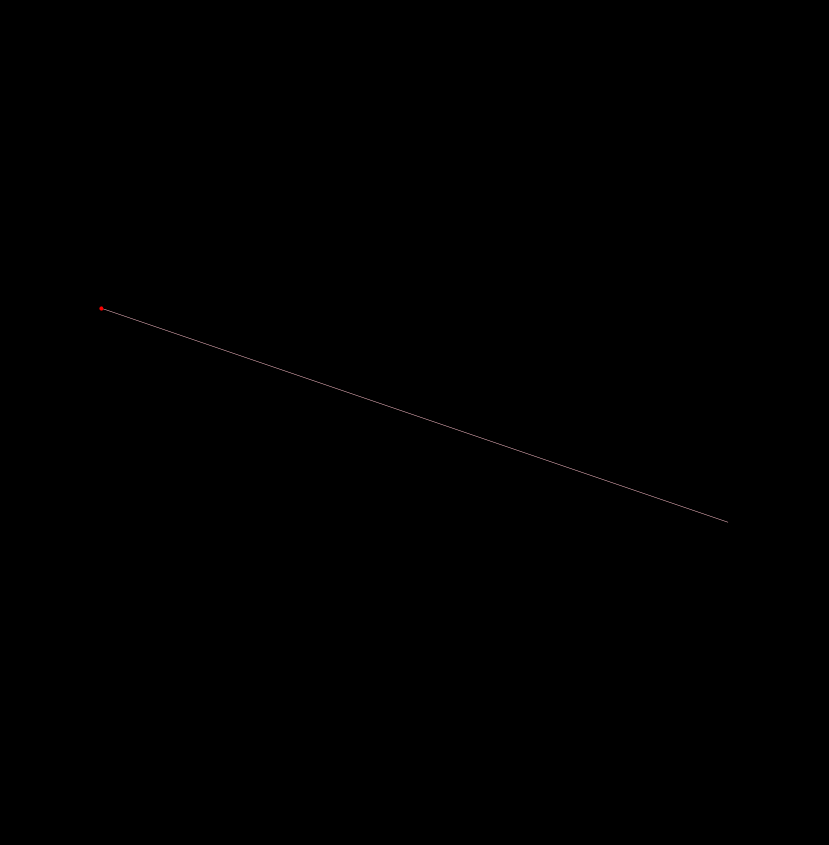

In [3]:
# Integrating the system dynamics to produce the curve

if __name__ == '__main__':
    
    T = 10
    t = np.arange(0,T,0.01)
    steps = len(t)                                  # Number of time steps
    states = np.zeros((len(t)*steps,3))             # [ (Number of time steps) x (3 coords) ]

    # Plotting the curve
    ax = plt.figure(facecolor = 'k', figsize=(15,15)).add_subplot(projection='3d')
    ax.set_facecolor('k')
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    ax.set_title("Aizawa Attractor")

    
    x, y, z = 0, 1, 1.05                            # Radnomly chosen initial condition!
    
    
    # Integrating numerically to 
    state = solve_ivp(aizawa_attractor_dynamics, (0, T), (x, y, z), method='RK45', dense_output=True)
    
    x, y, z = state.sol(t)                        # t vector defined earlier
    ax.scatter( xyz0, xyz1, xyz2, c='r', s=10)
    ax.text(xyz0, xyz1, xyz2, '{},{},{}'.format(xyz0, xyz1, xyz2))
    ax.plot(x, y, z, 'pink', lw=0.5)
    ax.set_axis_off()
    plt.show()